### Import Pokemon Data

In [1]:
loc <- "./data/pokemon.csv"
pokemonData <- read.csv(loc, header = T)

In [2]:
# assign column names to the imported dataset
colnames(pokemonData) <- c("number", "name", "type1", 
                           "type2", "total", "hp", "attack", 
                           "defense", "sp.atk", "sp.def",
                           "speed", "generation", "legendary")

In [3]:
#check top 5 rows of the dataset
head(pokemonData)

number,name,type1,type2,total,hp,attack,defense,sp.atk,sp.def,speed,generation,legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


In [4]:
# check summary of dataset
summary(pokemonData)

     number                           name         type1          type2    
 Min.   :  1.0   Abomasnow              :  1   Water  :112           :386  
 1st Qu.:184.8   AbomasnowMega Abomasnow:  1   Normal : 98   Flying  : 97  
 Median :364.5   Abra                   :  1   Grass  : 70   Ground  : 35  
 Mean   :362.8   Absol                  :  1   Bug    : 69   Poison  : 34  
 3rd Qu.:539.2   AbsolMega Absol        :  1   Psychic: 57   Psychic : 33  
 Max.   :721.0   Accelgor               :  1   Fire   : 52   Fighting: 26  
                 (Other)                :794   (Other):342   (Other) :189  
     total             hp             attack       defense      
 Min.   :180.0   Min.   :  1.00   Min.   :  5   Min.   :  5.00  
 1st Qu.:330.0   1st Qu.: 50.00   1st Qu.: 55   1st Qu.: 50.00  
 Median :450.0   Median : 65.00   Median : 75   Median : 70.00  
 Mean   :435.1   Mean   : 69.26   Mean   : 79   Mean   : 73.84  
 3rd Qu.:515.0   3rd Qu.: 80.00   3rd Qu.:100   3rd Qu.: 90.00  
 M

In [5]:
# Find top 10 Pokemon by Total Strength

top10 <- pokemonData[order(pokemonData$total, decreasing = T), c(2,5)][1:10,]
top10

,name,total
164,MewtwoMega Mewtwo X,780
165,MewtwoMega Mewtwo Y,780
427,RayquazaMega Rayquaza,780
423,KyogrePrimal Kyogre,770
425,GroudonPrimal Groudon,770
553,Arceus,720
269,TyranitarMega Tyranitar,700
410,SalamenceMega Salamence,700
414,MetagrossMega Metagross,700
419,LatiasMega Latias,700


In [6]:
# Find last 10 Pokemon by Total Strength

last10 <- pokemonData[order(pokemonData$total, decreasing = F), c(2,5)][1:10,]
last10

,name,total
207,Sunkern,180
323,Azurill,190
447,Kricketot,194
14,Caterpie,195
17,Weedle,195
289,Wurmple,195
304,Ralts,198
140,Magikarp,200
382,Feebas,200
733,Scatterbug,200


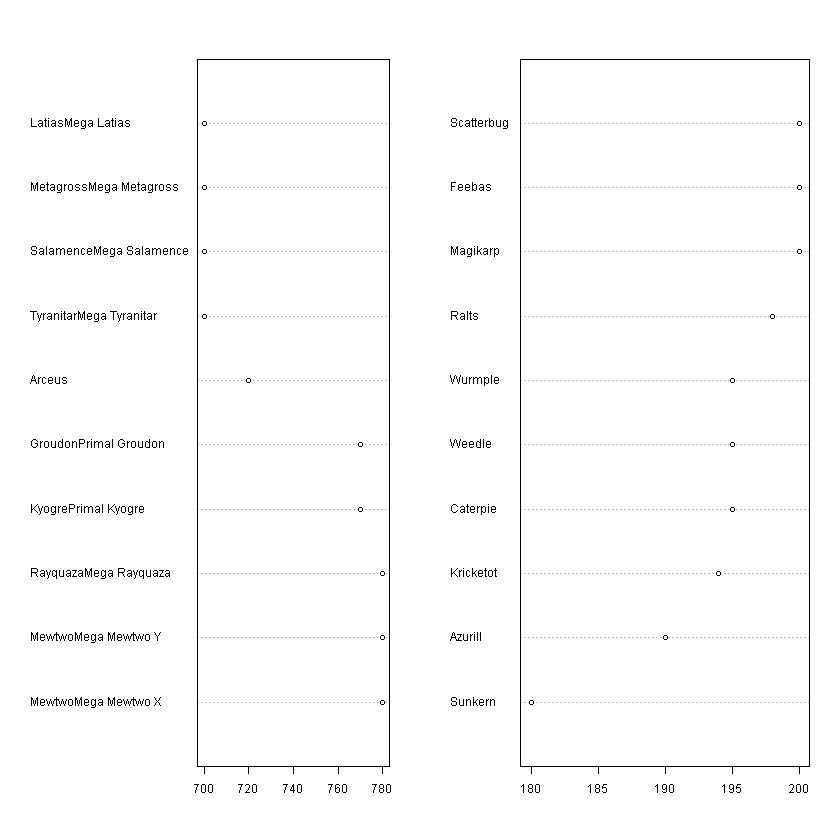

In [7]:
# Plot dotchart of the Top 10 and Last 10 Pokemons
par(mfrow = c(1,2))
dotchart(top10$total, labels = top10$name, cex= .6, pt.cex = .5)
dotchart(last10$total, labels = last10$name, cex= .6, pt.cex = .5)

I'm going to use the diagnostic plots for a linear regression model to see which Pokemon have the most unusual set of traits (e.g., hp, attack, defense) that combine to it's total strength.

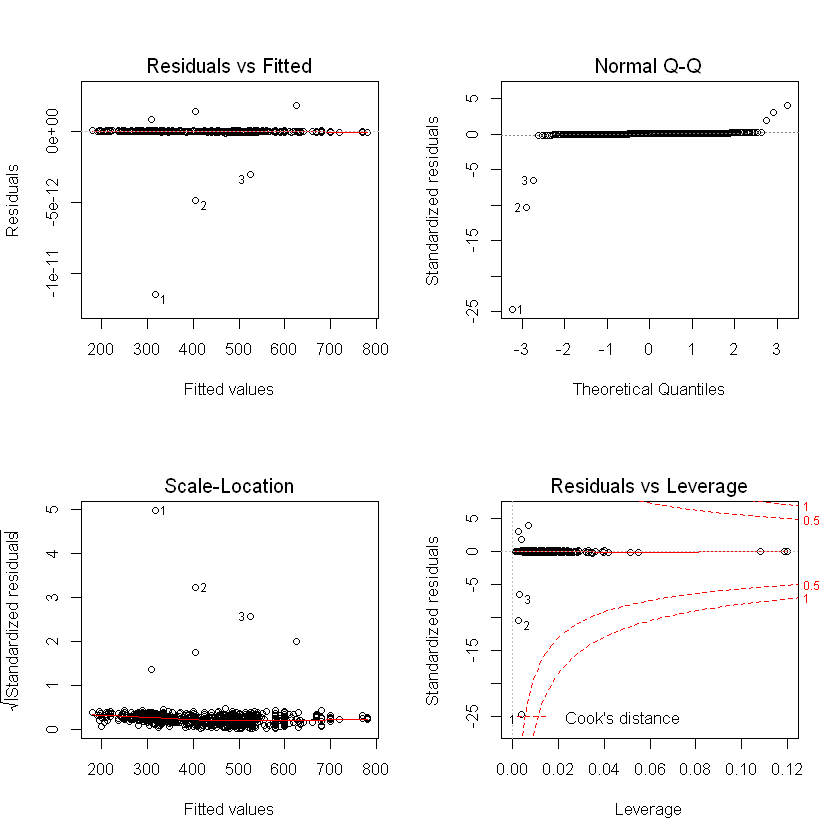

In [8]:
poke <- lm(total ~ hp + attack + defense + sp.atk + sp.def + speed, pokemonData)
par(mfrow = c(2,2))
plot(poke)

Observations 1, 3 and 6 have the most unusual combination of traits (in that order). Which Pokemon are these?

In [9]:
pokemonData[c(1,3,6), 2]

[1] Bulbasaur  Venusaur   Charmeleon
800 Levels: Abomasnow AbomasnowMega Abomasnow Abra Absol ... Zygarde50% Forme

It looks like Bulbasaur and it's evolved form Venusaur have the most unusual combination of traits of all the pokemon! 
Charmeleon is the next most unusual. Way to go Bulbasaur for being weird I guess?